In [24]:
import pandas as pd
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def load_dataset():
    dataset_path = "/Users/aaditmahajan/Documents/DDP stuff/ct-model/cyto_datasets_2025-04-01/processed_datasets/final_dataset.csv"
    df = pd.read_csv(dataset_path)

    X = df.drop(columns=['Canonical SMILES', 'target'])
    y = df['target']

    return X, y

def load_uncompressed_dataset():
    dataset_path = "/Users/aaditmahajan/Documents/DDP stuff/ct-model/cyto_datasets_2025-04-01/processed_datasets/uncompressed_dataset.csv"
    df = pd.read_csv(dataset_path)

    X = df.drop(columns=['Canonical SMILES', 'target'])
    y = df['target']

    return X, y

def run_lazypredict(X_train, X_test, y_train, y_test):
    reg = LazyRegressor(verbose=1)
    models = reg.fit( 
        X_train=X_train, 
        y_train=y_train,
        X_test=X_test,
        y_test=y_test)
    
    # convert results to DataFrame
    results = pd.DataFrame(models[0])
    results.reset_index(inplace=True)
    results.rename(columns={'index': 'Model'}, inplace=True)

    return results

  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -2.0681680612366224, 'Adjusted R-Squared': -3.3418540645175083, 'RMSE': 42.49009200318241, 'Time taken': 3.4537270069122314}
{'Model': 'BaggingRegressor', 'R-Squared': 0.36180168565915993, 'Adjusted R-Squared': 0.09686696107117276, 'RMSE': 19.37875738189882, 'Time taken': 11.913500785827637}
{'Model': 'BayesianRidge', 'R-Squared': 0.27128784418704566, 'Adjusted R-Squared': -0.031221814591394725, 'RMSE': 20.707425433917486, 'Time taken': 0.20552706718444824}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.09576889106722941, 'Adjusted R-Squared': -0.2796038017554152, 'RMSE': 23.06682502407812, 'Time taken': 1.867833137512207}
{'Model': 'DummyRegressor', 'R-Squared': -0.001064928151299993, 'Adjusted R-Squared': -0.4166361621624486, 'RMSE': 24.270527879512006, 'Time taken': 0.023462772369384766}
{'Model': 'ElasticNet', 'R-Squared': 0.18975777307254693, 'Adjusted R-Squared': -0.1465973949323922, 'RMSE': 21.835117622817034, 'Time taken': 0.038882

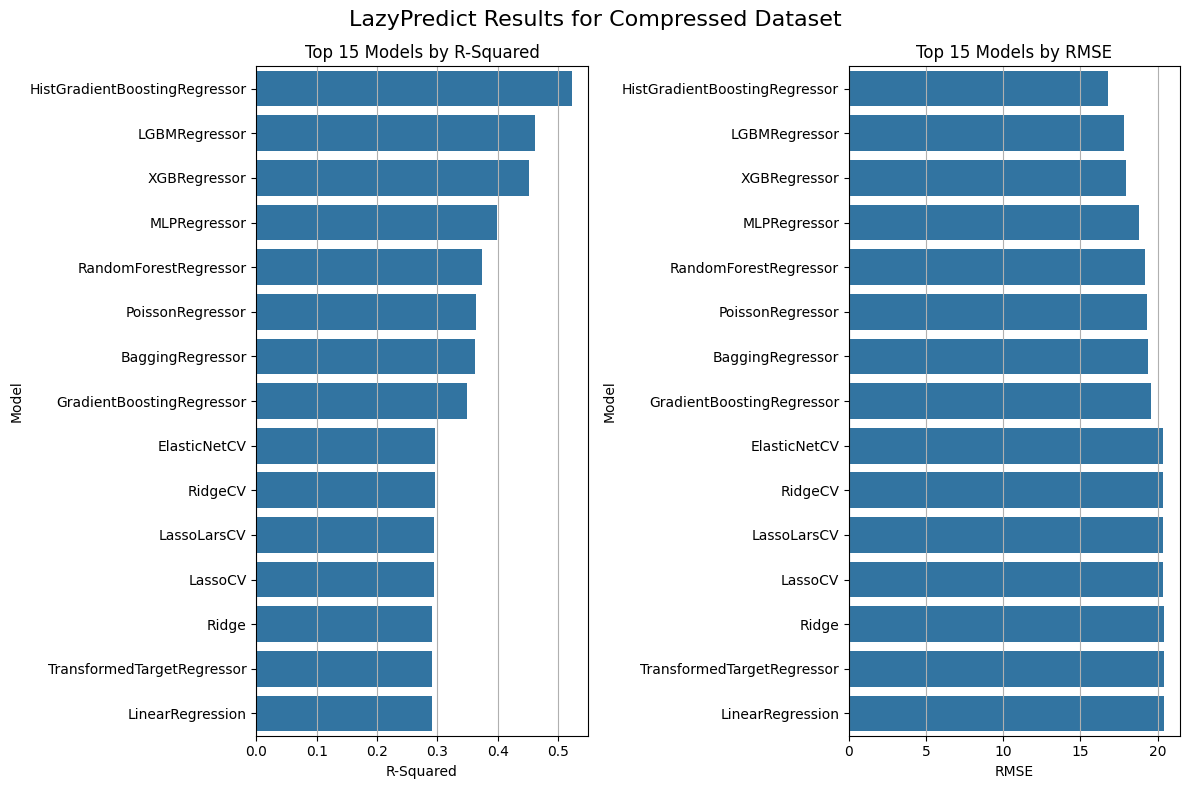

In [25]:
import os

X, y = load_dataset()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
results = run_lazypredict(X_train, X_test, y_train, y_test)
results.head()

# plot results
figures_dir = "/Users/aaditmahajan/Documents/DDP stuff/ct-model/cyto_datasets_2025-04-01/figures"
os.makedirs(figures_dir, exist_ok=True)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
sns.barplot(x='R-Squared', y='Model', data=results.sort_values(by='R-Squared', ascending=False).head(15))
plt.title('Top 15 Models by R-Squared')
plt.xlabel('R-Squared')
plt.ylabel('Model')
plt.grid(axis='x')

plt.subplot(1, 2, 2)
sns.barplot(x='RMSE', y='Model', data=results.sort_values(by='RMSE', ascending=True).head(15))
plt.title('Top 15 Models by RMSE')
plt.xlabel('RMSE')
plt.ylabel('Model')
plt.grid(axis='x')
plt.suptitle('LazyPredict Results for Compressed Dataset', fontsize=16)

plt.tight_layout()
plt.savefig(f"{figures_dir}/lazypredict_results.png", dpi=300)
plt.show()
